In [18]:
import argparse
from untils import *
from model import TCN
import torch.nn.functional as F

file_path = 'D:\Study\实验室\TCN\Fisher-model-master\container1.csv'
split_time = pd.datetime.strptime('2018-08-14 00:00:00', '%Y-%m-%d %H:%M:%S') # 数据集范围 2018-07-24 00:00:00 ~ 2018-08-24 00:00:00
look_back = 512
batch_size = 16
seq_len = 64    # The size to memorize
epochs = 10
iters = 100
n_classes = 1  # out size
n_train = 10000
n_test = 1000
model_para_path = './model/02-512'
dataset = load_data(file_path)
# scaler限制到0-1
reframed, scaler = normalize_and_make_series(dataset, look_back)
train_x, train_y, test_x, test_y = split_data(dataset, reframed, look_back, split_time)


<ipython-input-18-46704679efad>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_time = pd.datetime.strptime('2018-08-14 00:00:00', '%Y-%m-%d %H:%M:%S') # 数据集范围 2018-07-24 00:00:00 ~ 2018-08-24 00:00:00
D:\Study\实验室\TCN\load_pre\untils.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')


In [19]:
channel_sizes = [64] * 3
kernel_size = 2
dropout = 0.2
model = TCN(look_back, n_classes, channel_sizes, kernel_size, dropout=dropout)
model.eval()
model.double()

TCN(
  (tcn): TemporalConvNet(
    (network): Sequential(
      (0): TemporalBlock(
        (conv1): Conv1d(512, 64, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (dropout1): Dropout(p=0.2, inplace=False)
        (conv2): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp2): Chomp1d()
        (relu2): ReLU()
        (dropout2): Dropout(p=0.2, inplace=False)
        (net): Sequential(
          (0): Conv1d(512, 64, kernel_size=(2,), stride=(1,), padding=(1,))
          (1): Chomp1d()
          (2): ReLU()
          (3): Dropout(p=0.2, inplace=False)
          (4): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
          (5): Chomp1d()
          (6): ReLU()
          (7): Dropout(p=0.2, inplace=False)
        )
        (downsample): Conv1d(512, 64, kernel_size=(1,), stride=(1,))
        (relu): ReLU()
      )
      (1): TemporalBlock(
        (conv1): Conv1d(64, 64, kernel_size=(2,), stride=(1

In [20]:
model_dict=model.load_state_dict(torch.load(model_para_path))


In [21]:
i = 0
input = test_x
out = model(input)


In [22]:
out.size()


torch.Size([28288, 1])

In [23]:
test_y.size()


torch.Size([28288])

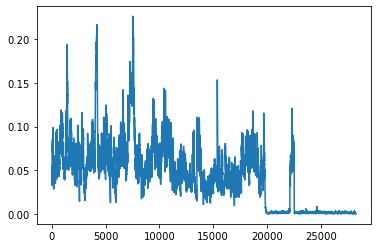

In [24]:
import matplotlib.pyplot as plt
x = range(len(test_y))
plt.plot(x,test_y)


In [25]:
out

tensor([[0.0408],
        [0.0417],
        [0.0410],
        ...,
        [0.0552],
        [0.0552],
        [0.0553]], dtype=torch.float64, grad_fn=<AddmmBackward>)

In [26]:
out = out.view(-1).detach().numpy()
# plt.plot(x,out)


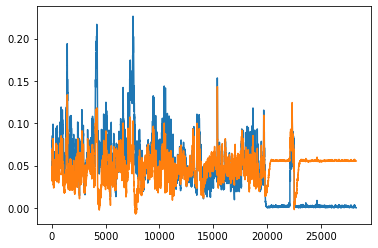

In [27]:
x = range(len(test_y))
plt.plot(x,test_y)
plt.plot(x,out)


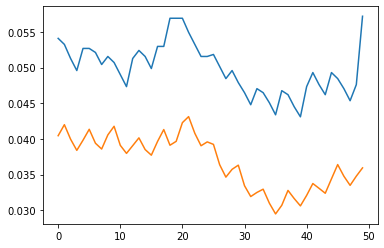

In [30]:
start = 600
show_size = 50
x = range(len(test_y[start:start+show_size]))
plt.plot(x,test_y[start:start+show_size])
plt.plot(x,out[start:start+show_size])



In [26]:
from torch import nn
from tcn import TemporalConvNet
tcn = TemporalConvNet(64, [64, 64], kernel_size=2, dropout=0.2)
tcn.double()
tcn_out = tcn(input)

In [27]:
tcn_out.size()


torch.Size([16, 64, 1])

In [36]:
tcn_out = tcn_out.view(batch_size, -1)
tcn_out.size()

torch.Size([16, 64])

In [40]:
input_size = 64
output_size = 1
ln = nn.Linear(input_size, output_size)
ln.double()
ln_out = ln(tcn_out)


In [43]:
ln_out.size()[0]



16

In [42]:
ln_out


tensor([[0.0648],
        [0.0654],
        [0.0445],
        [0.0627],
        [0.0513],
        [0.0645],
        [0.0702],
        [0.0550],
        [0.0585],
        [0.0889],
        [0.0668],
        [0.0640],
        [0.0429],
        [0.0721],
        [0.0902],
        [0.0630]], dtype=torch.float64, grad_fn=<AddmmBackward>)

In [17]:
# output = model(train_x[0])
#

In [16]:
# output = model(train_x)
